In [11]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv("../data/processed_weather_data.csv")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (1656, 5)


,temperature,humidity,pressure,wind_speed,weather
0,-0.154501,-0.881339,0.162686,-0.555270,0
1,-0.676133,0.371485,-0.001287,-0.068962,1
2,-0.330152,-1.140544,-0.001287,0.309847,0
3,-1.253122,1.537908,0.490631,-0.575746,1
4,-0.285441,-0.794937,-0.001287,0.099966,0


In [13]:
X = df.drop("weather", axis=1)

print("Feature Shape:", X.shape)


Feature Shape: (1656, 4)


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


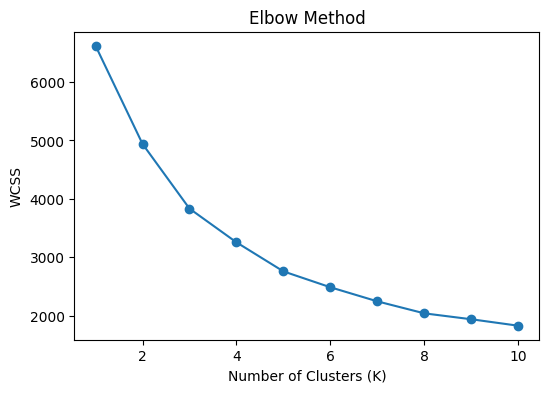

In [15]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()


In [16]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters
df.head()


,temperature,humidity,pressure,wind_speed,weather,Cluster
0,-0.154501,-0.881339,0.162686,-0.555270,0,1
1,-0.676133,0.371485,-0.001287,-0.068962,1,0
2,-0.330152,-1.140544,-0.001287,0.309847,0,1
3,-1.253122,1.537908,0.490631,-0.575746,1,0
4,-0.285441,-0.794937,-0.001287,0.099966,0,1


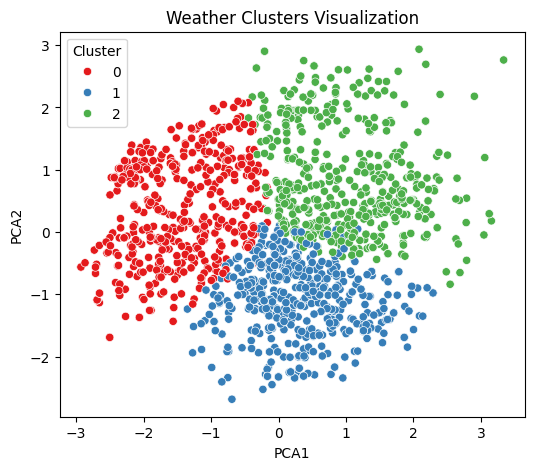

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PCA1"] = X_pca[:,0]
df["PCA2"] = X_pca[:,1]

plt.figure(figsize=(6,5))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="Set1")
plt.title("Weather Clusters Visualization")
plt.show()


In [18]:
cluster_summary = df.groupby("Cluster").mean()
cluster_summary


,temperature,humidity,pressure,wind_speed,weather,PCA1,PCA2
Cluster,,,,,,,
0,-0.962876,0.670291,0.710215,-0.505806,0.903101,-1.409194,0.347794
1,0.421282,-0.982625,0.135954,-0.305151,0.388235,0.291914,-1.044029
2,0.451708,0.438149,-0.820851,0.812038,1.071560,1.015515,0.810524


In [ ]:
df.to_csv("../data/weather_clustered.csv", index=False)
print("Clustered dataset saved")


✅ Clustered dataset saved
